### Practice Theory topics

#### Feature Scaling

In [1]:
import pandas as pd
from sklearn.datasets import load_iris

data = load_iris()
df = pd.DataFrame(data.data, columns=data.feature_names)
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


**1. StandardScaler(Z-score Normalization)**

In [2]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaled = scaler.fit_transform(df)

scaled_df = pd.DataFrame(scaled, columns=df.columns)
scaled_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,-0.900681,1.019004,-1.340227,-1.315444
1,-1.143017,-0.131979,-1.340227,-1.315444
2,-1.385353,0.328414,-1.397064,-1.315444
3,-1.506521,0.098217,-1.283389,-1.315444
4,-1.021849,1.249201,-1.340227,-1.315444


**2. MinMaxScaler**

In [3]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaled = scaler.fit_transform(df)

scaled_df = pd.DataFrame(scaled, columns=df.columns)
scaled_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,0.222222,0.625000,0.067797,0.041667
1,0.166667,0.416667,0.067797,0.041667
2,0.111111,0.500000,0.050847,0.041667
3,0.083333,0.458333,0.084746,0.041667
4,0.194444,0.666667,0.067797,0.041667


 **3. Normalization**

In [4]:
from sklearn.preprocessing import Normalizer

scaler =  Normalizer()
scaled_data = scaler.fit_transform(df)
scaled_df = pd.DataFrame(data=scaled_data, columns=df.columns)

scaled_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,0.803773,0.551609,0.220644,0.031521
1,0.828133,0.507020,0.236609,0.033801
2,0.805333,0.548312,0.222752,0.034269
3,0.800030,0.539151,0.260879,0.034784
4,0.790965,0.569495,0.221470,0.031639


**4. Absolute Maximum Scaling**

In [5]:
from sklearn.preprocessing import MaxAbsScaler

scaler = MaxAbsScaler()
scaled = scaler.fit_transform(df)
scaled_df = pd.DataFrame(scaled, columns=df.columns)
scaled_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,0.645570,0.795455,0.202899,0.08
1,0.620253,0.681818,0.202899,0.08
2,0.594937,0.727273,0.188406,0.08
3,0.582278,0.704545,0.217391,0.08
4,0.632911,0.818182,0.202899,0.08


**5. Robust Scaling**

In [6]:
from sklearn.preprocessing import RobustScaler

scaler = RobustScaler()
scaled = scaler.fit_transform(df)
scaled_df = pd.DataFrame(scaled, columns=df.columns)

scaled_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,-0.538462,1.0,-0.842857,-0.733333
1,-0.692308,0.0,-0.842857,-0.733333
2,-0.846154,0.4,-0.871429,-0.733333
3,-0.923077,0.2,-0.814286,-0.733333
4,-0.615385,1.2,-0.842857,-0.733333


### Dealing with Imbalanced Datasets


In [51]:
from sklearn.datasets import make_classification

X, y = make_classification(
    n_samples=1100, 
    n_features=2, 
    n_informative=2, 
    n_redundant=0,
    n_clusters_per_class=1,
    weights=[0.9, 0.1],  # This creates the imbalance: 90% class 0, 10% class 1
    random_state=42
)

In [52]:
import matplotlib.pyplot as plt
from collections import Counter

def visualize_dataset(X, y, title):
    plt.figure(figsize=(10, 6))
    
    # Plot each class with a different color
    plt.scatter(X[y == 0, 0], X[y == 0, 1], label='Class 0', alpha=0.7, color='blue', edgecolor='k')
    plt.scatter(X[y == 1, 0], X[y == 1, 1], label='Class 1', alpha=0.7, color='red', edgecolor='k')
    
    plt.title(title)
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    
    # Add class counts to the legend
    class_counts = Counter(y)
    legend_labels = [f'Class 0: {class_counts[0]} samples', f'Class 1: {class_counts[1]} samples']
    plt.legend(legend_labels)
    
    plt.tight_layout()
    plt.show()

In [54]:
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.DataFrame(X)
df['target'] = y 

df['target'].value_counts()

target
0    984
1    116
Name: count, dtype: int64

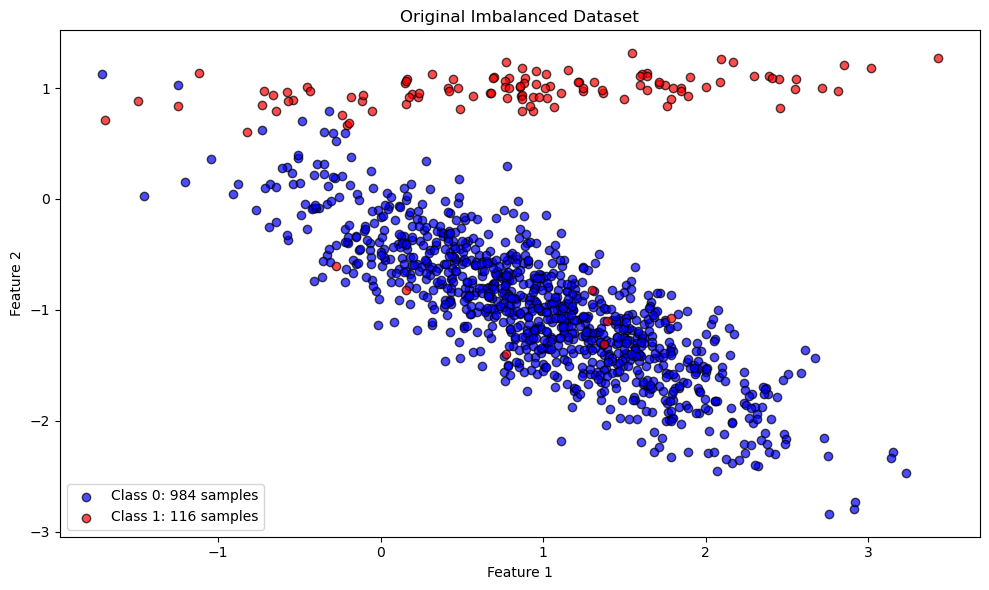

In [55]:
visualize_dataset(X, y, 'Original Imbalanced Dataset')

**1. Over Sampling Method**

In [57]:
from imblearn.over_sampling import RandomOverSampler

ros = RandomOverSampler()
X_resampled_ros, y_resampled_ros = ros.fit_resample(X, y)

In [59]:
df_OS = pd.DataFrame(X_resampled_ros)
df_OS['target'] = y_resampled_ros

df_OS['target'].value_counts()

target
0    984
1    984
Name: count, dtype: int64

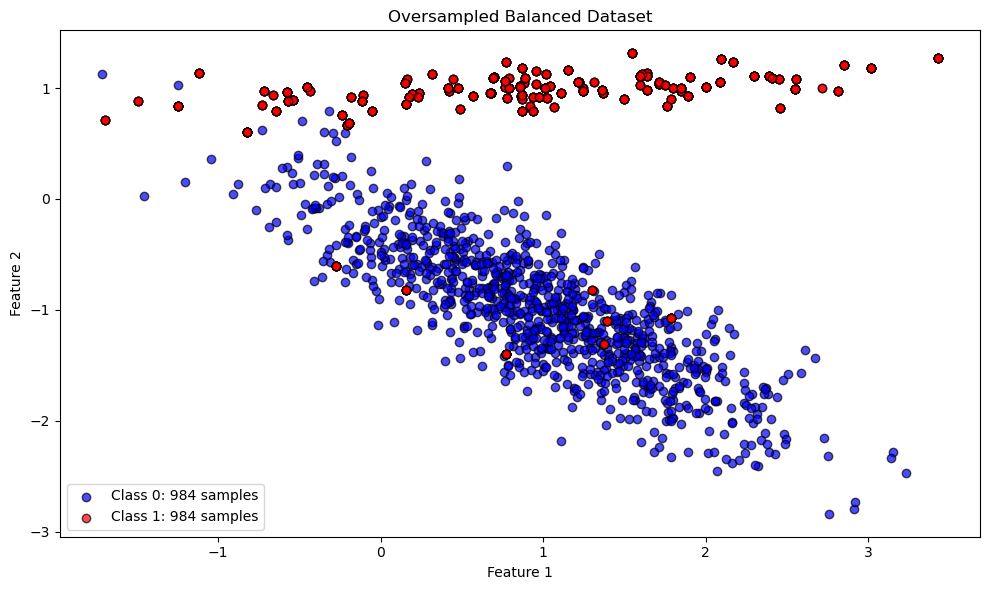

In [60]:
visualize_dataset(X_resampled_ros, y_resampled_ros, 'Oversampled Balanced Dataset')

**2. Under Sampling Method**

In [61]:
from imblearn.under_sampling import RandomUnderSampler

rus = RandomUnderSampler()
X_resampled_rus, y_resampled_rus = rus.fit_resample(X, y)

In [62]:
df_US = pd.DataFrame(X_resampled_rus)

df_US['target'] = y_resampled_rus

df_US['target'].value_counts()

target
0    116
1    116
Name: count, dtype: int64

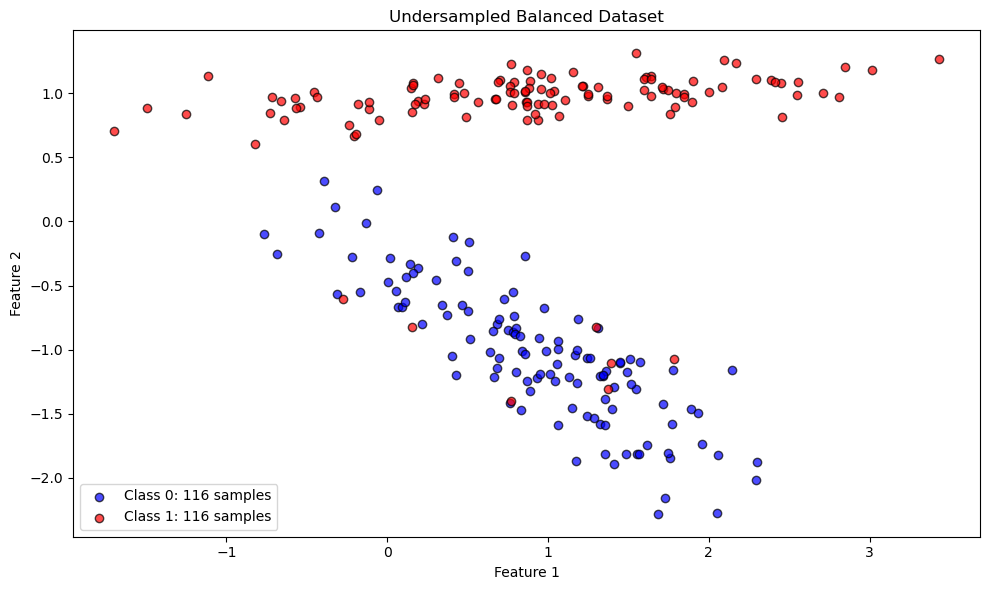

In [63]:
visualize_dataset(X_resampled_rus, y_resampled_rus, 'Undersampled Balanced Dataset')

**3. SMOTE(Synthetic Minority Oversampling Technique)**

In [49]:
from imblearn.over_sampling import SMOTE

smote = SMOTE()
X_resampled_sm, y_resampled_sm = smote.fit_resample(X,y)

In [50]:
df_SM = pd.DataFrame(X_resampled_sm, columns=[f'Feature_{i}' for i in range(1, 6)])
df_SM['target'] = y_resampled_sm

df_SM['target'].value_counts()

target
1    895
0    895
Name: count, dtype: int64

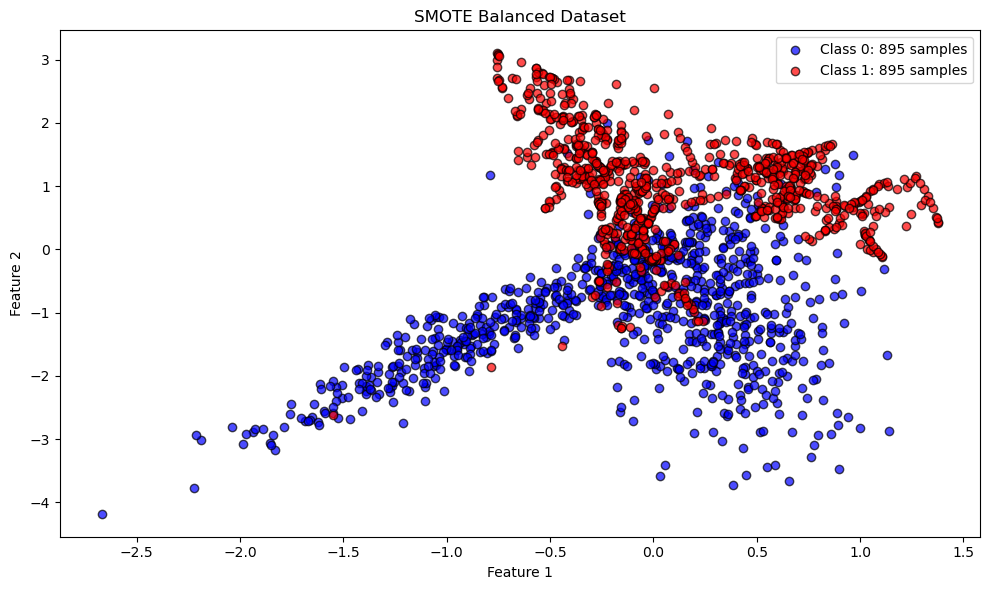

In [64]:
visualize_dataset(X_resampled_sm, y_resampled_sm, 'SMOTE Balanced Dataset')